# Data preparation

Miembros del grupo:
- Fernando Jiménez-Díaz
- Juan Ignacio de Blas

In [4]:
# We will use pandas, a very widespread library in python
# In case you have never used it, or want to review its documentation
# These are some interesting docs:
# http://pandas.pydata.org/pandas-docs/stable/
# https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

### read data

In [6]:
# read_csv is the function that reads csvs, it returns a Pandas dataframe
df = pd.read_csv('prosperLoanData.txt')


FileNotFoundError: [Errno 2] No such file or directory: 'prosperLoanData.txt'

In [ ]:
# Check number of rows and columns
print ('The DataSet has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The DataSet has 113937 rows and 81 columns


In [ ]:
# Check the columns name
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Algunas de las columnas claves del dataset son:

- **LoanStatus**: Esta variable representa el estado acual del prestamo. Puede tener las siguientes categorías: 'Cancelled', 'Chargedoff', 'Completed', 'Current', 'Default', 'FinalPaymentInProgress' y 'PastDue'. Hay que destacar que este último vendrá acompañado de un 'Delicuency bucket'


- **LoanMonthsSinceOrigination**: Esta variable representa el número de meses transcurridos desde la fecha de originación.


- **LoanFirstDefaultedCycleNumber**: Esta variable representa el ciclo del préstamo hasta que incurrió en Default.


- **LoanCurrentDaysDelinquent**: Esta variable representa el número de días en las que el préstamo incurrío en mora


# Performance & Sample Window

<Axes: >

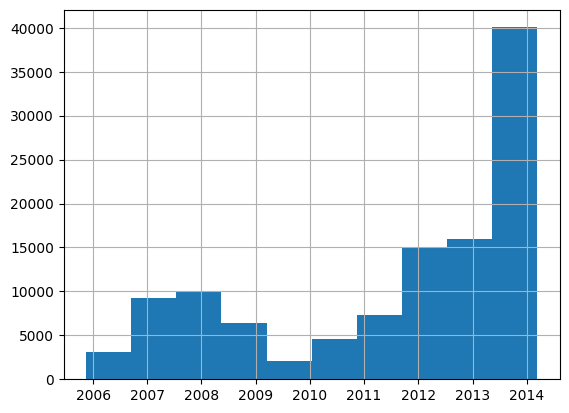

In [ ]:
pd.to_datetime(df.LoanOriginationDate.str[:10]).hist()

**TODO 1** Seleccionar y razonar la columna que debería ser usada como input para nuestra variable objetivo. Existen dos opciones:
- Opción A: **LoanStatus** 
- Opción B: **LoanFirstDefaultedCycleNumber** 

Escribe tu respuesta aquí: Tiene que ser LoanFirstDefaultedCycleNumber, puesto que el LoanStatus es una variable mucho más compleja, que no se limita a describir si el préstamo ha sido impagado o no, que es lo que nos interesa.

## Vintage analysis

El análisis Vintage nos permite entender el comportamiento de los prestamos con respecto al bad rate, para cada año de origen del préstamo, y para cada ventana en la que evaluamos si ha habido default.

In [ ]:
df.head(50)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.00,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.00,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.00,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.00,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2

In [ ]:
# Years since loan origination
df['LoanMonthsSinceOriginationY'] = (df.LoanMonthsSinceOrigination / 12).round()
# Quarter in which the Loan defaulted
df['LoanFirstDefaultedCycleNumberQ'] = 4* (df.LoanFirstDefaultedCycleNumber / 4).round()
# Get the number of loans per origination year
df_vintage = df.groupby('LoanMonthsSinceOriginationY').agg({'LoanMonthsSinceOriginationY': 'size'})\
                                                     .rename(columns={'LoanMonthsSinceOriginationY': 'N_loans'})\
                                                     .reset_index()


# For each year, compute the cummulative sum of defaulted loans per quarter
df['bad_aux'] = ~df['LoanFirstDefaultedCycleNumber'].isna()
df_def_per_cycle = pd.DataFrame(df.groupby(['LoanMonthsSinceOriginationY', 'LoanFirstDefaultedCycleNumberQ'])['bad_aux'].sum().groupby(level=[0]).cumsum()).reset_index()
df_def_per_cycle.columns = df_def_per_cycle.columns[:-1].tolist() +  ['N_bads']

# Merge both data sources, compute the bad rate
df_vintage = df_vintage.merge(df_def_per_cycle, on='LoanMonthsSinceOriginationY')
df_vintage['BR'] = 100. * df_vintage['N_bads'] / df_vintage['N_loans']

df_vintage.head()

,LoanMonthsSinceOriginationY,N_loans,LoanFirstDefaultedCycleNumberQ,N_bads,BR
0,0.0,29808,4.0,1,0.003355
1,0.0,29808,8.0,3,0.010064
2,1.0,21134,0.0,3,0.014195
3,1.0,21134,4.0,18,0.085171
4,1.0,21134,8.0,462,2.186051


In [ ]:
# Transform from long to wide format
df_vin_pvt = df_vintage.pivot(index='LoanMonthsSinceOriginationY', columns='LoanFirstDefaultedCycleNumberQ', values='BR')
df_vin_pvt

LoanFirstDefaultedCycleNumberQ,0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,44.0
LoanMonthsSinceOriginationY,,,,,,,,,,,,
0.0,NaN,0.003355,0.010064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.014195,0.085171,2.186051,2.943125,3.368979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.039757,0.462181,5.342411,8.180101,12.160819,13.850512,15.132691,15.321539,15.326508,NaN,NaN,NaN
3.0,0.497830,0.931836,5.731427,8.424815,12.215982,14.003064,16.504978,17.870820,19.019658,19.211131,19.223896,NaN
4.0,1.117222,1.460983,4.417326,6.170505,8.765899,10.072190,12.220694,13.234789,14.575455,15.177037,15.830182,NaN
5.0,0.861009,NaN,6.150062,9.963100,14.022140,15.252153,17.958180,19.311193,20.541205,21.156212,22.017220,NaN
6.0,1.280445,1.851079,8.427279,12.985386,20.215727,23.291580,27.446068,29.485038,31.649269,32.713987,34.036186,34.043145
7.0,1.988015,2.872634,13.297822,18.814801,25.292495,28.659755,33.368211,35.708171,38.761533,40.017122,41.396366,NaN
8.0,1.276596,2.723404,11.177305,15.829787,22.978723,25.929078,29.900709,31.659574,34.269504,35.659574,36.964539,NaN


<Axes: xlabel='LoanFirstDefaultedCycleNumberQ'>

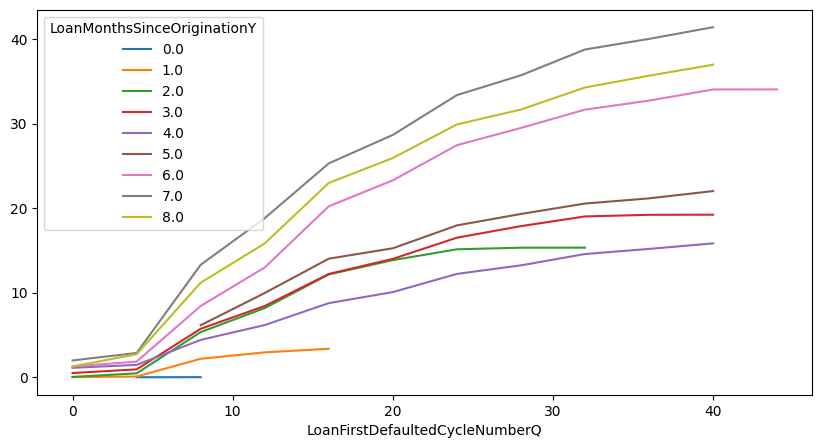

In [ ]:
df_vin_pvt.transpose().plot(figsize=(10, 5))

**TODO 2** Explica qué aprendizajes se pueden leer en la gráfica anterior. Razona si los prestamos originados hace 7 años tienen un comportamiento parecido o diferente con respecto a los prestamos originados hace 3 años.

Escribe tu respuesta aquí: Es evidente que con el paso de los años, las métricas para decidir a quien conceder un préstamos y a quien no, han mejorado. Esto se puede observar en la gráfica superior donde vemos que los créditos generan cada vez menos impagos. Otro factor influyente es la crisis de 2008 ya que los peores datos de impago de los diferentes vintages corresponden a los prestamos dados en esos años. El comportamiento entre ellos, sin embargo, si que es más similar, teniendo un una subida especialmente notable tras los primeros pagos y poco a poco estabilizando la curva. 

## Good, bad, indeterminate definition

**TODO 3** Implementa una función, que añada las siguientes columnas a nuestro dataframe df:
- **PW**: Captura si el préstamo tiene una madurez(LoanMonthsSinceOrigination) mayor que la PW (Performance window). La variable de entrada PW_size captura el número de meses de la PW.
- **fraud.**: Captura si el préstamo puede considerarse como un caso de fraude. En nuestro caso, consideramos fraude los préstamos que hayan tenido un evento de impago antes de TH_fraud.
- **bad.**: Captura si el préstamo cumple la condición de malo. En nuestro caso, que el evento de impago haya ocurrido después de TH_fraud, y antes del final de la PW
- **indeterm**: Captura si el préstamo se considera indeterminado. Definiremos indeterminados aquellos prestamos que han caído en impago después de la Performance window

In [ ]:
def generate_pop_flags(df, PW_size, TH_fraud=4):
    df['PW']= ''
    for r in df:
        df.loc[df['LoanMonthsSinceOrigination']>PW_size, 'PW'] = True
        df.loc[df['LoanMonthsSinceOrigination']<PW_size, 'PW'] = False
    df['PW'] = df['PW'].replace(r'^\s*$', False, regex=True)
    df['fraud']= ''
    for r in df:
        df.loc[df['LoanFirstDefaultedCycleNumber']<TH_fraud, 'fraud'] = True
        df.loc[df['LoanFirstDefaultedCycleNumber']>TH_fraud, 'fraud'] = False
    df['fraud'] = df['fraud'].replace(r'^\s*$', False, regex=True)
    bad = []
    for value in df["LoanFirstDefaultedCycleNumber"]:
        if value > TH_fraud and value < PW_size:
            bad.append(True)
        else:
            bad.append(False)
    df['bad']= bad
    df['indeterm']= ''
    for r in df:
        df.loc[df['LoanFirstDefaultedCycleNumber']>PW_size, 'indeterm'] = True
        df.loc[df['LoanFirstDefaultedCycleNumber']<PW_size, 'indeterm'] = False
    df['indeterm'] = df['indeterm'].replace(r'^\s*$', False, regex=True)   
    PW =df['PW'].sum()
    fraud =df['fraud'].sum()
    bad =df['bad'].sum()
    indeterm =df['indeterm'].sum()
    return f'PW: {PW} ratio: {PW/len(df)} | fraud: {fraud} ratio: {fraud/len(df)}| bad: {bad} ratio: {bad/len(df)} | indeterm: {indeterm} ratio: {indeterm/len(df)}'
        

    ## Implement the function HERE ##

In [ ]:
generate_pop_flags(df, 16, TH_fraud=4)

'PW: 64818 ratio: 0.5688933357908318 | fraud: 560 ratio: 0.0049149968842430464| bad: 8626 ratio: 0.07570850557764379 | indeterm: 7051 ratio: 0.061885076840710214'

In [ ]:
len(df)

113937

**TODO 4** Para diferentes PW_size (se recomiendan evaluar los siguientes valores: 6, 9, 12, 15 y 18), evalúa el volumen y ratio de prestamos con madurez, prestamos fraudulentos, prestamos que cumplan la definición de bad, y préstamos que se consideren indeterminados. Por último, argumenta cuál es el valor de PW_size que se debería usar. La función se debe usar con el valor por defecto de  TH_fraud=4

In [ ]:
# Test different PW_size values here
generate_pop_flags(df, 6, TH_fraud=4)

'PW: 84129 ratio: 0.738381737275863 | fraud: 560 ratio: 0.0049149968842430464| bad: 379 ratio: 0.0033263996770144903 | indeterm: 15294 ratio: 0.13423207562073777'

In [ ]:
generate_pop_flags(df, 9, TH_fraud=4)

'PW: 75441 ratio: 0.6621290713288923 | fraud: 560 ratio: 0.0049149968842430464| bad: 2930 ratio: 0.025715965840771654 | indeterm: 12549 ratio: 0.11013981410779641'

In [ ]:
generate_pop_flags(df, 12, TH_fraud=4)

'PW: 69522 ratio: 0.6101793096184733 | fraud: 560 ratio: 0.0049149968842430464| bad: 5600 ratio: 0.04914996884243047 | indeterm: 9993 ratio: 0.08770636404328708'

In [ ]:
generate_pop_flags(df, 15, TH_fraud=4)

'PW: 66218 ratio: 0.5811808280014394 | fraud: 560 ratio: 0.0049149968842430464| bad: 7928 ratio: 0.06958231303264084 | indeterm: 7764 ratio: 0.06814292108796967'

In [ ]:
generate_pop_flags(df, 18, TH_fraud=4)

'PW: 61143 ratio: 0.5366386687379868 | fraud: 560 ratio: 0.0049149968842430464| bad: 9980 ratio: 0.08759226590133144 | indeterm: 5835 ratio: 0.05121251217778246'

Como es lógico, cuanto mayor valor le des a la Performance Window menores serán nuestras métricas 'PW' y 'indeterm', y mayor será 'bad'. Entre las opciones dadas considero que lo más óptimo es tomar la opción del medio (PW=12).

In [ ]:
PW_size = 12# Aplica el valor determinado en el TODO anterior
df1 = generate_pop_flags(df, PW_size)

In [ ]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,PW,fraud,bad,indeterm
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,6.0,NaN,False,True,False,False,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0.0,NaN,False,False,False,False,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,7.0,NaN,False,True,False,False,False
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2

## First exclusion set

**TODO 5** Implementa una función que ejecutará las exclusiones a nuestro dataframe. La función debe excluir los siguientes préstamos:
- Préstamos que tengan una madurez menor que la PW
- Préstamos que se consideren como fraude
    

In [ ]:
def filter_exclusions(df):
    df = df[df['PW']==True]
    df = df[df['fraud'] ==False]
    return df

In [ ]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,PW,fraud,bad,indeterm
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,6.0,NaN,False,True,False,False,False
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0.0,NaN,False,False,False,False,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,7.0,NaN,False,True,False,False,False
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2

In [ ]:
df = filter_exclusions(df)
print ('The DataSet has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The DataSet has 68963 rows and 88 columns


## Bad rate

In [ ]:
df.bad.value_counts()

bad
False    63591
True      5372
Name: count, dtype: int64

In [ ]:
100. * df.bad.value_counts() / df.shape[0]

bad
False    92.210316
True      7.789684
Name: count, dtype: float64

In [ ]:
df[['ListingCreationDate', 'LoanOriginationDate']].head()

,ListingCreationDate,LoanOriginationDate
0,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00
2,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00
3,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00
10,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00
11,2007-10-09 20:28:33.640000000,2007-10-18 00:00:00


In [ ]:
df['LoanOriginationDate'] = pd.to_datetime(df.LoanOriginationDate.str[:10])
df['LoanOriginationYear'] = pd.to_datetime(df.LoanOriginationDate.values).year

In [ ]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,PW,fraud,bad,indeterm,LoanOriginationYear
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.00,0.0,0.0,1.0,0,0,0.0,258,6.0,NaN,False,True,False,False,False,2007
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.00,0.0,0.0,1.0,0,0,0.0,41,7.0,NaN,False,True,False,False,False,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.0849,0.0249,0.0600,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.00,0.0,0.0,1.0,0,0,0.0,158,1.0,NaN,False,True,False,False,False,2012
10,0F123545674891886D9F106,587746,2012-05-10 07:04:01.577000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,0.2332,0.0890,0.1442,4.0,C,7.0,1,MD,Fireman,Employed,300.0,False,False,NaN,2012-04-22 08:38:09,640.0,659.0,1989-11-29 00:00:00,2.0,2.0,56.0,4,25.0,1.0,2.0,1.0,253.0,28.0,1.0,0.0,387.0,0.51,363.0,47.0,0.72,0.0,0.12,"$75,000-99,999",True,7500.000000,7C083651269973612460D6D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22,65946,13500,2012-05-17,Q2 2012,495135444217488604DC05A,395.37,8

## Additional exclusions

Una vez aplicadas las exclusiones anteriores, vamos a estudiar la tasa de malos por año de origen del préstamo.

**TODO 6** Implementa una función agregue los préstamos por año (LoanOriginationYear), y compute el número de prestamos, el número de "malos" y la tasa de malos.

In [ ]:
def describe_yearly_BR(df, col_year,col_target):
    df = df.groupby([col_year])[col_target].agg(['count', 'sum'])
    df['Ratio Malo'] = (df['sum']/df['count']).round(4)
    df.columns = ['Total Prestamos','Total Malos','Ratio Malo']
    return df

In [ ]:
col_year = 'LoanOriginationYear'
col_target = 'bad'
#col_target = # Fill the name of the target column
describe_yearly_BR(df, col_year,col_target)

,Total Prestamos,Total Malos,Ratio Malo
LoanOriginationYear,,,
2005,22,0,0.0000
2006,5822,786,0.1350
2007,11240,1313,0.1168
2008,11411,1011,0.0886
2009,2033,82,0.0403
2010,5579,214,0.0384
2011,11208,715,0.0638
2012,19546,1186,0.0607
2013,2102,65,0.0309


**TODO 7** Usando los resultados obtenidos por la función describe_yearly_BR, define cuál será la Sample Window (qué años se consideraran para capturar préstamos en la población). La Sample Window debe de cumplir las siguientes condiciones: 
- Debe de tener un ratio de positivos (malos, en nuestro caso) aproximadamente constante
- Debe de capturar un periodo que en principio debería representar el entorno en que se usará el modelo
- Debe de capturar un periodo lo más reciente posible

Define también qué periodo temporal capturará la muestra IT (In Time), y la muestra OOT (Out of time).

Una vez usado la nueva función creada, se pueden analizar de una forma rápida y visual el número de préstamos por año, el número de 'malos' y el ratio de malos. A la hora de seleccionar la Sample Window, debemos descartar el año 2005 ya que no tiene suficientes registros de prestamos malos. Se deben descartar también los datos de los años 2006,2007 y 2008 ya que el ratio de prestamos malos es demasiado elevado en comparación con el resto de años, lo cual se debe a la crisis producida en 2008. Tampoco deberiamos seleccionar los prestamos de 2009 y 2010 ya que no hay suficientes registros malos y tampoco tiene una tasa constante. Por lo que seleccionariamos como IT solo los años 2011 y 2012, y el resto de la muestra sería 00T.

### Final output sampling:

   

 - IT (In Time):
     - Train
     - Validation 
     - Reject Inference sample
 - OOT (Out of time)


In [ ]:
df_it = df[(df['LoanOriginationYear'] == 2011)| (df['LoanOriginationYear'] == 2012)]
# - 60% Train, 20% val, 20% RI
df_train = df_it.sample(frac=0.6, random_state=42)
df_val_ri = df_it.loc[~df_it.index.isin(df_train.index)]
df_val = df_val_ri.sample(frac=0.2, random_state=42)
df_ri = df_val_ri.loc[~df_val_ri.index.isin(df_val.index)]

In [ ]:
df_oot = df[(df['LoanOriginationYear'] != 2011)| (df['LoanOriginationYear'] != 2012)]

In [ ]:
len(df_it), len(df_train), len(df_val), len(df_ri), len(df_oot)

(30754, 18452, 2460, 9842, 68963)